<a href="https://colab.research.google.com/github/hutauf/IQ-Star-solver/blob/main/IQ_Star_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy, matplotlib
from matplotlib import pyplot as plt

In [ ]:
import turtle

In [ ]:
def create_map():
  first_line = [""]*7
  second_line = [""]*6
  third_line = [""]*7
  fourth_line = [""]*6
  map=[first_line, second_line, third_line, fourth_line]
  return map

In [ ]:
def draw_map(map):
  fig, ax = plt.subplots(1)
  for j, line in enumerate(map):
    for i, cell in enumerate(line):
      if j in [1,3]:
        x_offset = 0.5
      else:
        x_offset = 0.0
      x = i + x_offset
      y = j
      if not cell:
        marker = "."
        color = "grey"
        markersize = 10
      else:
        marker = "*"
        color = cell
        markersize = 65
      plt.plot([x], [y], marker = marker, color=color, markersize=markersize)
    plt.ylim((3.5, -0.5))
    plt.xlim((-0.5, 6.5))

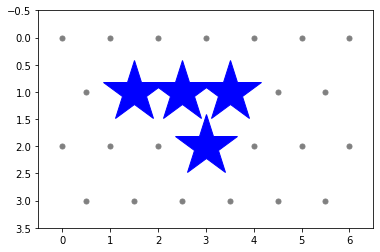

In [ ]:
map = create_map()
map[1][1] = "b"
map[1][2] = "b"
map[1][3] = "b"
map[2][3] = "b"

draw_map(map)

In [ ]:
class Part():
  def __init__(self, angles, color):
    self.angles = angles
    self.color = color
  def rotate(self):
    return Part(color=self.color, angles = [(i+60)%360 for i in self.angles])
  

In [ ]:
blue = Part(angles=[0,0,120], color="blue")

In [ ]:
def _get_next_xy(x,y,angle):
  if angle==0:
    x = x+1
    return x,y
  if angle==180:
    x = x-1
    return x,y
  if angle==60:
    if y in [0,2]:
      y+=1
    else:
      y+=1
      x+=1
    return x,y
  if angle==120:
    if y in [0,2]:
      y+=1
      x-=1
    else:
      y+=1
    return x,y
  if angle==240:
    if y in [0,2]:
      y-=1
      x-=1
    else:
      y-=1
    return x,y
  if angle==300:
    if y in [0,2]:
      y-=1
    else:
      y-=1
      x+=1
    return x,y
  #still here:
  raise Exception("unsupported angle %s"%angle)

def verify_on_map(x,y):
  if y not in [0,1,2,3]:
    return False
  if not (x>=0 and x<7):
    return False
  if y==1 and x==6:
    return False
  if y==3 and x==6:
    return False
  return True

def get_next_xy(x,y,angle):
  x,y = _get_next_xy(x,y,angle)
  if verify_on_map(x,y):
    return x,y
  else:
    return None

import copy
def add_part(map, part, loc):
  map = copy.deepcopy(map)
  x,y = loc
  if map[y][x] not in ["", part.color]:
    return None
  map[y][x] = part.color
  #iterate to next location:
  for angle in part.angles:
    xy = get_next_xy(x,y,angle)
    if xy is None:
      return None
    else:
      x,y = xy
    if map[y][x] in [part.color, ""]:
      map[y][x] = part.color
    else:
      return None
    #print("adding at x,y", x, y)
  return map




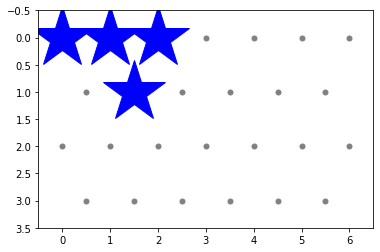

In [ ]:
#put blue on map at 0,0,0:
map = create_map()
map = add_part(map, blue, loc=[0,0])
draw_map(map)

In [ ]:
yellow = Part(color="yellow", angles=[0,0,240])
red = Part(color="red", angles = [0,300,180])
pink = Part(color="pink", angles=[0,300,240])
green = Part(color="green", angles=[0,0,300])
purple = Part(color="purple", angles=[0,0])
orange = Part(color="orange", angles=[0,300])


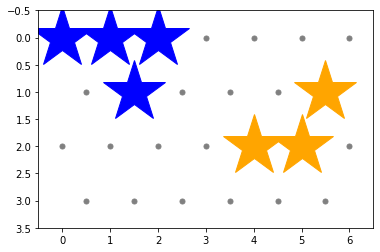

In [ ]:
map = create_map()
map = add_part(map, blue, loc=(0,0))
map = add_part(map, orange, loc=(4,2))
draw_map(map)

In [ ]:
map = create_map()
map = add_part(map, blue, loc=(0,0))
map = add_part(map, orange, loc=(0,0))
assert map is None

In [ ]:
import copy
def add_parts(map, parts):
  if len(parts)==0:
    return map
  #take next part:
  part = parts[0]
  for rotation in range(6):
    part = part.rotate()
    for y in range(4):
      for x in range(7):
        if y in [1,3] and x==6:
          continue
        map2 = add_part(map, part, loc=(x,y))
        if map2 is None:
          continue
        map3 = add_parts(map2, parts[1:])
        if map3 is None:
          continue
        else:
          return map3
        

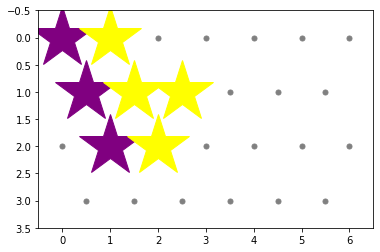

In [ ]:
map=create_map()
map2=add_parts(map, [purple, yellow])
draw_map(map2)

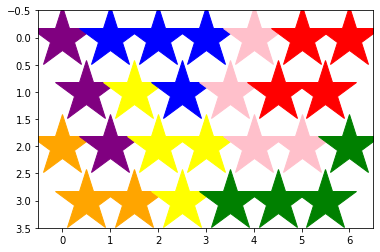

In [ ]:
map=create_map()
map2=add_parts(map, [purple, yellow, blue, red, pink, orange, green])
draw_map(map2)

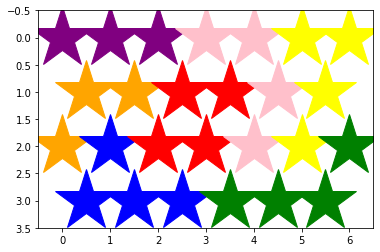

In [ ]:
#79
map=create_map()
map[1][2]="red"
map[1][3]="red"
map[2][2]="red"
map[2][3]="red"

map2=add_parts(map, [purple, yellow, blue, pink, orange, green])
draw_map(map2)

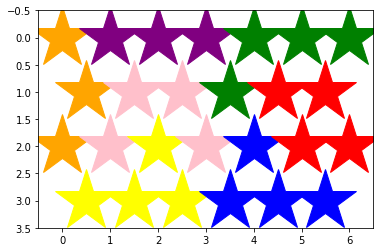

In [ ]:
#109
map=create_map()
map[0][3]="purple"
map[3][1]="yellow"
map[3][4]="blue"

map2=add_parts(map, [purple, yellow, blue, pink, orange, green, red])
draw_map(map2)